In [3]:
! pip install pandas numpy seaborn matplotlib


  Using cached numpy-2.1.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached contourpy-1.3.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 6.3 MB/s eta 0:00:00 M

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes =True)
%matplotlib inline

In [7]:
diab=pd.read_csv("ML/UCI_data.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:

diab.isnull().values.any()
## To check if data contains null values

np.False_

In [9]:

diab.describe()
## To run numerical descriptive stats for the data set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
(diab.Pregnancies == 0).sum(),(diab.Glucose==0).sum(),(diab.BloodPressure==0).sum(),(diab.SkinThickness==0).sum(),(diab.Insulin==0).sum(),(diab.BMI==0).sum(),(diab.DiabetesPedigreeFunction==0).sum(),(diab.Age==0).sum()
## Counting cells with 0 Values for each variable and publishing the counts below

(np.int64(111),
 np.int64(5),
 np.int64(35),
 np.int64(227),
 np.int64(374),
 np.int64(11),
 np.int64(0),
 np.int64(0))

In [11]:
## Creating a dataset called 'dia' from original dataset 'diab' with excludes all rows with have zeros only for Glucose, BP, Skinthickness, Insulin and BMI, as other columns can contain Zero values.
drop_Glu=diab.index[diab.Glucose == 0].tolist()
drop_BP=diab.index[diab.BloodPressure == 0].tolist()
drop_Skin = diab.index[diab.SkinThickness==0].tolist()
drop_Ins = diab.index[diab.Insulin==0].tolist()
drop_BMI = diab.index[diab.BMI==0].tolist()
c=drop_Glu+drop_BP+drop_Skin+drop_Ins+drop_BMI
dia=diab.drop(diab.index[c])

In [12]:
dia.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [13]:
dia.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
dia1 = dia[dia.Outcome==1]
dia0 = dia[dia.Outcome==0]


In [15]:
dia1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
732,2,174,88,37,120,44.5,0.646,24,1
740,11,120,80,37,150,42.3,0.785,48,1
748,3,187,70,22,200,36.4,0.408,36,1
753,0,181,88,44,510,43.3,0.222,26,1


In [16]:
dia0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
18,1,103,30,38,83,43.3,0.183,33,0
20,3,126,88,41,235,39.3,0.704,27,0
27,1,97,66,15,140,23.2,0.487,22,0
28,13,145,82,19,110,22.2,0.245,57,0
...,...,...,...,...,...,...,...,...,...
747,1,81,74,41,57,46.3,1.096,32,0
751,1,121,78,39,74,39.0,0.261,28,0
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


Text(0.5, 1.0, 'Count Plot for Outcome')

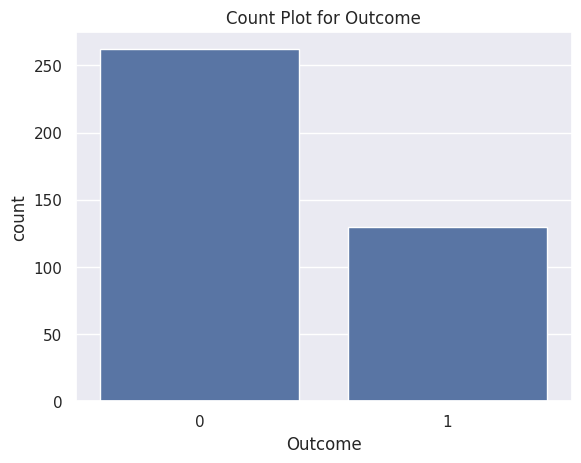

In [17]:
## creating count plot with title using seaborn
sns.countplot(x=dia.Outcome)
plt.title("Count Plot for Outcome")


In [18]:
# Computing the %age of diabetic and non-diabetic in the sample
Out0=len(dia[dia.Outcome==1])
Out1=len(dia[dia.Outcome==0])
Total=Out0+Out1
PC_of_1 = Out1*100/Total
PC_of_0 = Out0*100/Total
PC_of_1, PC_of_0


(66.83673469387755, 33.16326530612245)

/tmp/ipykernel_828828/4280913006.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia.Pregnancies,kde=False)
/tmp/ipykernel_828828/4280913006.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia0.Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
/tmp/ipykernel_828828/428091300

Text(0.5, 1.0, 'Boxplot for Preg by Outcome')

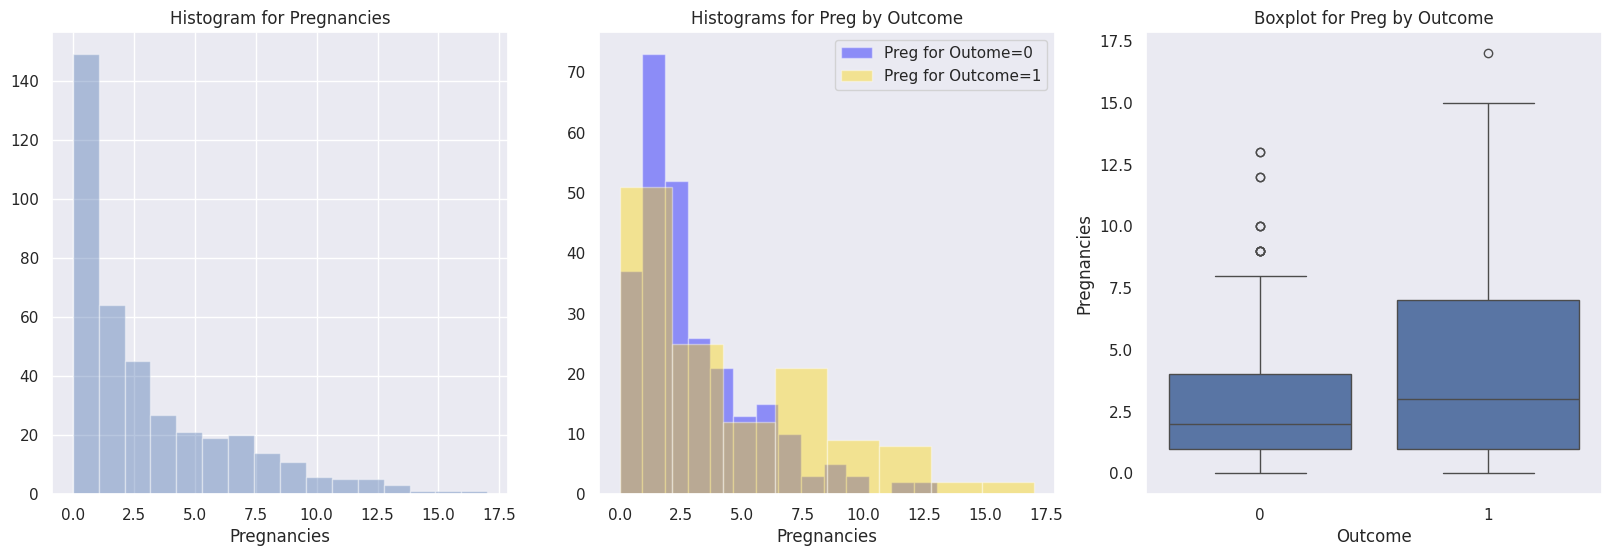

In [19]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.distplot(dia.Pregnancies,kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.distplot(dia1.Pregnancies,kde=False,color = "Gold", label = "Preg for Outcome=1")
plt.title("Histograms for Preg by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Pregnancies)
plt.title("Boxplot for Preg by Outcome")

/tmp/ipykernel_828828/3035691168.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia.Glucose, kde=False)
/tmp/ipykernel_828828/3035691168.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia0.Glucose,kde=False,color="Gold", label="Gluc for Outcome=0")
/tmp/ipykernel_828828/3035691168.py:7

Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

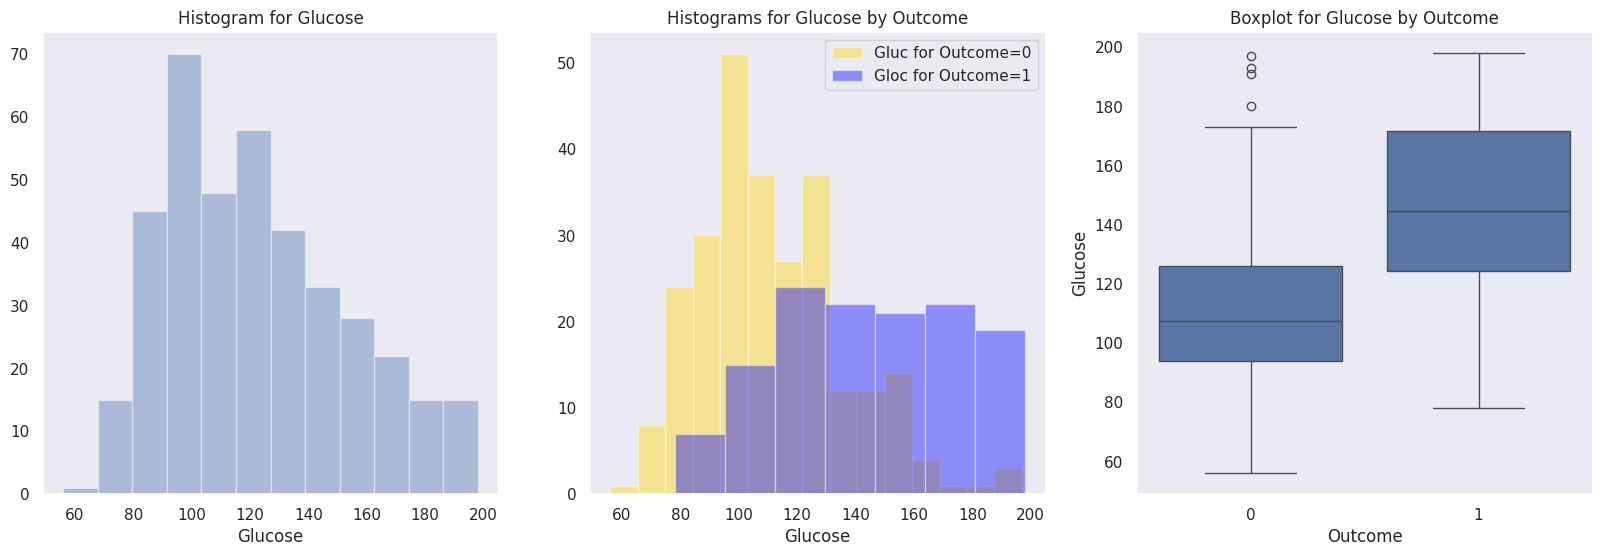

In [20]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title("Histogram for Glucose")
sns.distplot(dia.Glucose, kde=False)
plt.subplot(1,3,2)
sns.distplot(dia0.Glucose,kde=False,color="Gold", label="Gluc for Outcome=0")
sns.distplot(dia1.Glucose, kde=False, color="Blue", label = "Gloc for Outcome=1")
plt.title("Histograms for Glucose by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Glucose)
plt.title("Boxplot for Glucose by Outcome")


/tmp/ipykernel_828828/3569083744.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia.BloodPressure, kde=False)
/tmp/ipykernel_828828/3569083744.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia0.BloodPressure,kde=False,color="Gold",label="BP for Outcome=0")
/tmp/ipykernel_828828/356908

Text(0.5, 1.0, 'Boxplot of BP by Outcome')

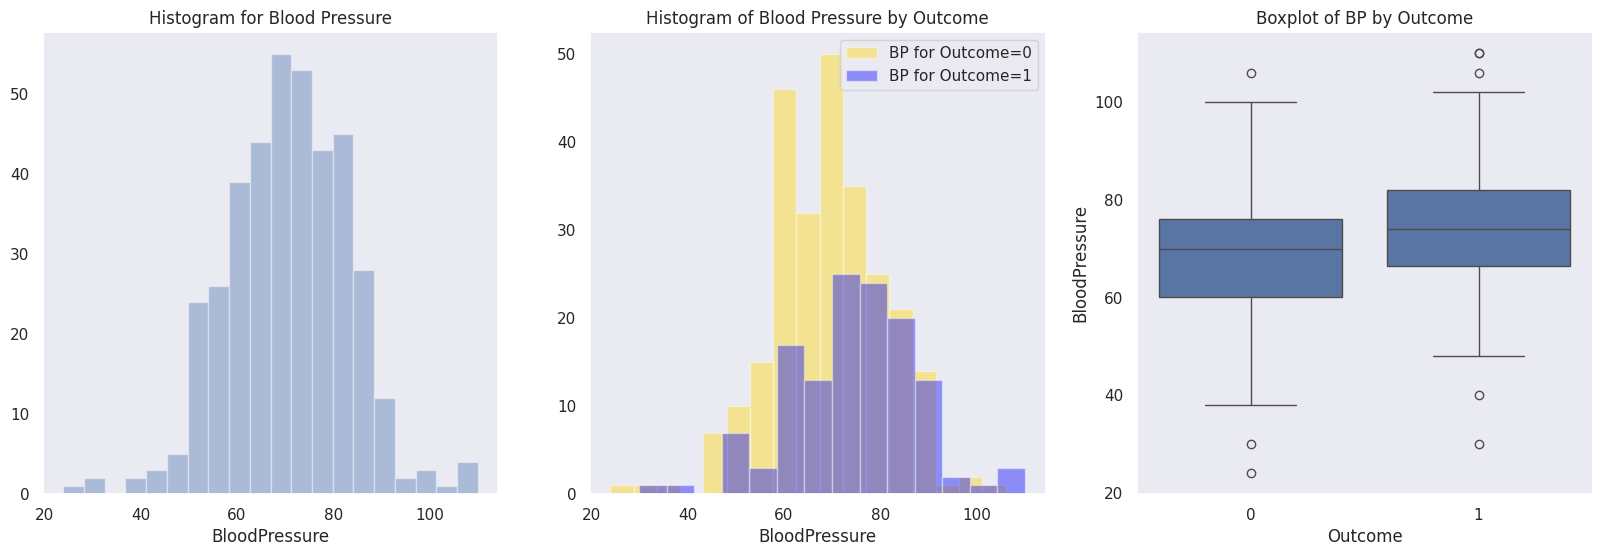

In [21]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.BloodPressure, kde=False)
plt.title("Histogram for Blood Pressure")
plt.subplot(1,3,2)
sns.distplot(dia0.BloodPressure,kde=False,color="Gold",label="BP for Outcome=0")
sns.distplot(dia1.BloodPressure,kde=False, color="Blue", label="BP for Outcome=1")
plt.legend()
plt.title("Histogram of Blood Pressure by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.BloodPressure)
plt.title("Boxplot of BP by Outcome")


/tmp/ipykernel_828828/2108735207.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia.SkinThickness, kde=False)
/tmp/ipykernel_828828/2108735207.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia0.SkinThickness, kde=False, color="Gold", label="SkinThick for Outcome=0")
/tmp/ipykernel_828

Text(0.5, 1.0, 'Boxplot of SkinThickness by Outcome')

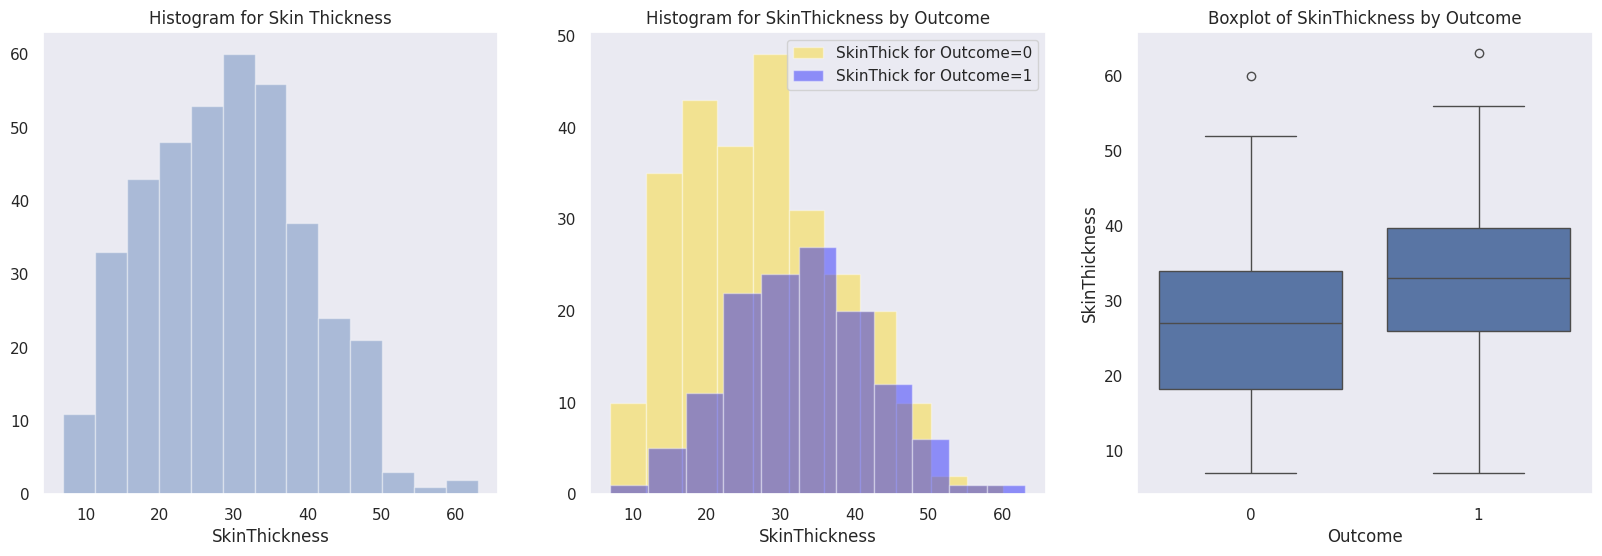

In [22]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.SkinThickness, kde=False)
plt.title("Histogram for Skin Thickness")
plt.subplot(1,3,2)
sns.distplot(dia0.SkinThickness, kde=False, color="Gold", label="SkinThick for Outcome=0")
sns.distplot(dia1.SkinThickness, kde=False, color="Blue", label="SkinThick for Outcome=1")
plt.legend()
plt.title("Histogram for SkinThickness by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.SkinThickness)
plt.title("Boxplot of SkinThickness by Outcome")


/tmp/ipykernel_828828/2097968294.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia.Insulin,kde=False)
/tmp/ipykernel_828828/2097968294.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia0.Insulin,kde=False, color="Gold", label="Insulin for Outcome=0")
/tmp/ipykernel_828828/2097968294.p

Text(0.5, 1.0, 'Boxplot for Insulin by Outcome')

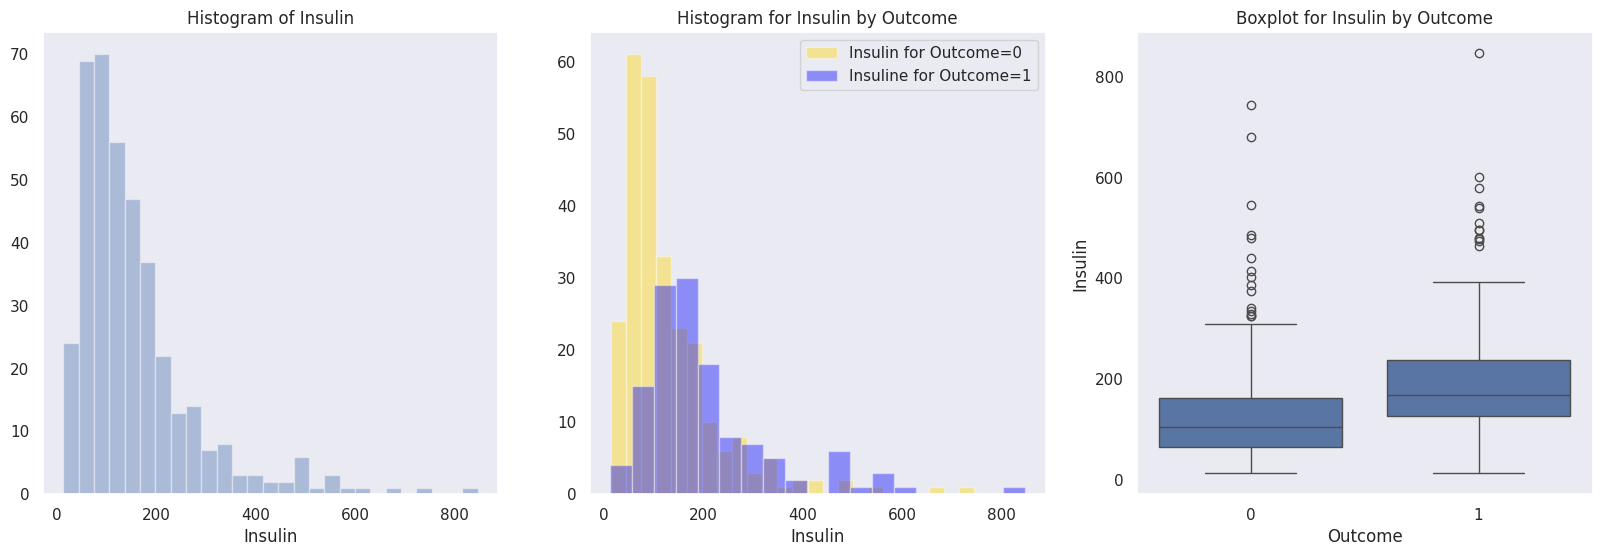

In [23]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.Insulin,kde=False)
plt.title("Histogram of Insulin")
plt.subplot(1,3,2)
sns.distplot(dia0.Insulin,kde=False, color="Gold", label="Insulin for Outcome=0")
sns.distplot(dia1.Insulin,kde=False, color="Blue", label="Insuline for Outcome=1")
plt.title("Histogram for Insulin by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.Insulin)
plt.title("Boxplot for Insulin by Outcome")


/tmp/ipykernel_828828/3737035207.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia.BMI, kde=False)
/tmp/ipykernel_828828/3737035207.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia0.BMI, kde=False,color="Gold", label="BMI for Outcome=0")
/tmp/ipykernel_828828/3737035207.py:7: UserWa

Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

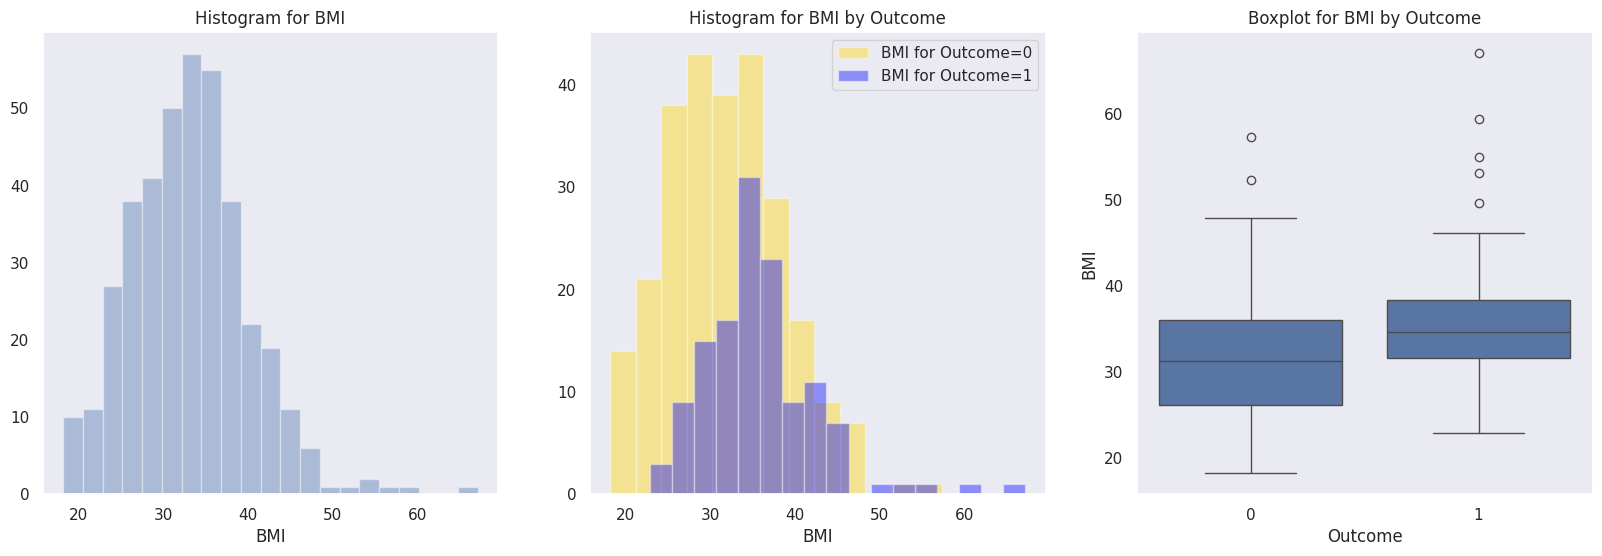

In [24]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.BMI, kde=False)
plt.title("Histogram for BMI")
plt.subplot(1,3,2)
sns.distplot(dia0.BMI, kde=False,color="Gold", label="BMI for Outcome=0")
sns.distplot(dia1.BMI, kde=False, color="Blue", label="BMI for Outcome=1")
plt.legend()
plt.title("Histogram for BMI by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.BMI)
plt.title("Boxplot for BMI by Outcome")


/tmp/ipykernel_828828/2520786897.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia.DiabetesPedigreeFunction,kde=False)
/tmp/ipykernel_828828/2520786897.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia0.DiabetesPedigreeFunction, kde=False, color="Gold", label="PedFunction for Outcome

Text(0.5, 1.0, 'Boxplot for DiabetesPedigreeFunction by Outcome')

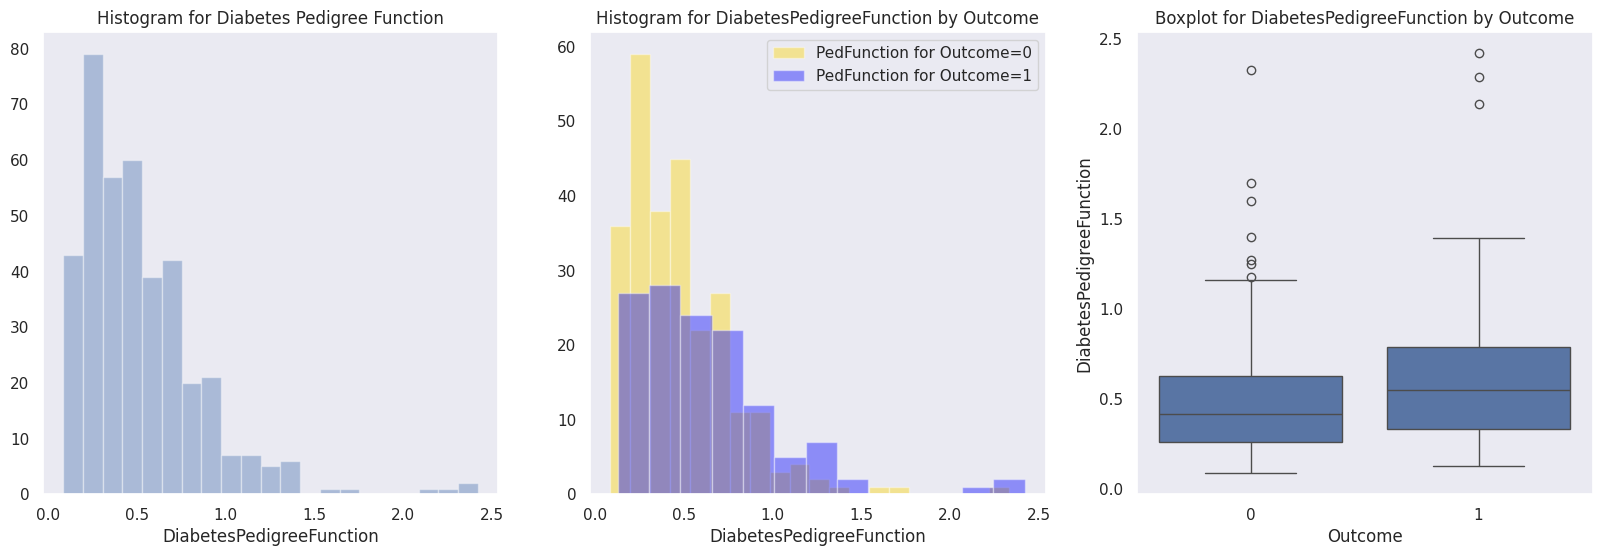

In [25]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.DiabetesPedigreeFunction,kde=False)
plt.title("Histogram for Diabetes Pedigree Function")
plt.subplot(1,3,2)
sns.distplot(dia0.DiabetesPedigreeFunction, kde=False, color="Gold", label="PedFunction for Outcome=0")
sns.distplot(dia1.DiabetesPedigreeFunction, kde=False, color="Blue", label="PedFunction for Outcome=1")
plt.legend()
plt.title("Histogram for DiabetesPedigreeFunction by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.DiabetesPedigreeFunction)
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")

/tmp/ipykernel_828828/2761140119.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia.Age,kde=False)
/tmp/ipykernel_828828/2761140119.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia0.Age,kde=False,color="Gold", label="Age for Outcome=0")
/tmp/ipykernel_828828/2761140119.py:7: UserWarn

Text(0.5, 1.0, 'Boxplot for Age by Outcome')

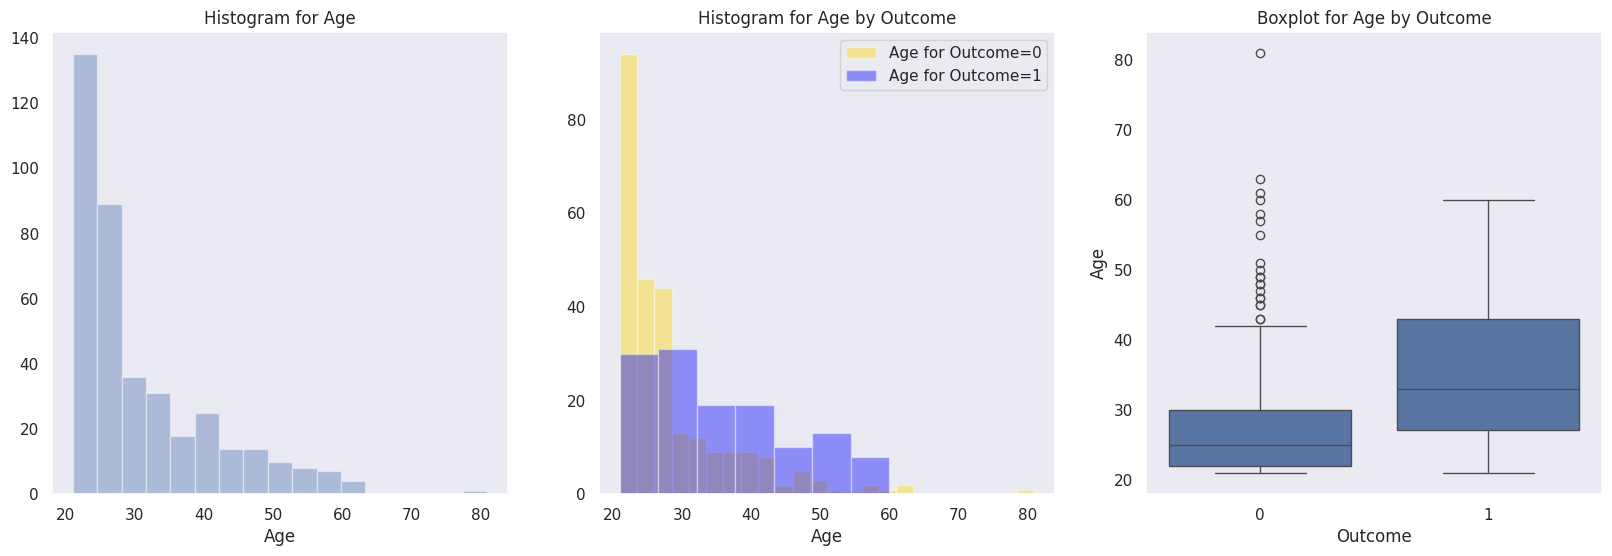

In [26]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.Age,kde=False)
plt.title("Histogram for Age")
plt.subplot(1,3,2)
sns.distplot(dia0.Age,kde=False,color="Gold", label="Age for Outcome=0")
sns.distplot(dia1.Age,kde=False, color="Blue", label="Age for Outcome=1")
plt.legend()
plt.title("Histogram for Age by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Age)
plt.title("Boxplot for Age by Outcome")


In [29]:
!pip install scipy

  Using cached scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (40.8 MB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [30]:
## importing stats module from scipy
from scipy import stats
## retrieving p value from normality test function
PregnanciesPVAL=stats.normaltest(dia.Pregnancies).pvalue
GlucosePVAL=stats.normaltest(dia.Glucose).pvalue
BloodPressurePVAL=stats.normaltest(dia.BloodPressure).pvalue
SkinThicknessPVAL=stats.normaltest(dia.SkinThickness).pvalue
InsulinPVAL=stats.normaltest(dia.Insulin).pvalue
BMIPVAL=stats.normaltest(dia.BMI).pvalue
DiaPeFuPVAL=stats.normaltest(dia.DiabetesPedigreeFunction).pvalue
AgePVAL=stats.normaltest(dia.Age).pvalue
## Printing the values
print("Pregnancies P Value is " + str(PregnanciesPVAL))
print("Glucose P Value is " + str(GlucosePVAL))
print("BloodPressure P Value is " + str(BloodPressurePVAL))
print("Skin Thickness P Value is " + str(SkinThicknessPVAL))
print("Insulin P Value is " + str(InsulinPVAL))
print("BMI P Value is " + str(BMIPVAL))
print("Diabetes Pedigree Function P Value is " + str(DiaPeFuPVAL))
print("Age P Value is " + str(AgePVAL))

Pregnancies P Value is 6.155097831782508e-20
Glucose P Value is 1.3277887088487345e-05
BloodPressure P Value is 0.030164917115239397
Skin Thickness P Value is 0.01548332935449814
Insulin P Value is 8.847272035922274e-43
BMI P Value is 1.4285556992424915e-09
Diabetes Pedigree Function P Value is 1.1325395699626466e-39
Age P Value is 1.0358469089881947e-21


Text(0.5, 1.0, 'Pairplot of Variables by Outcome')

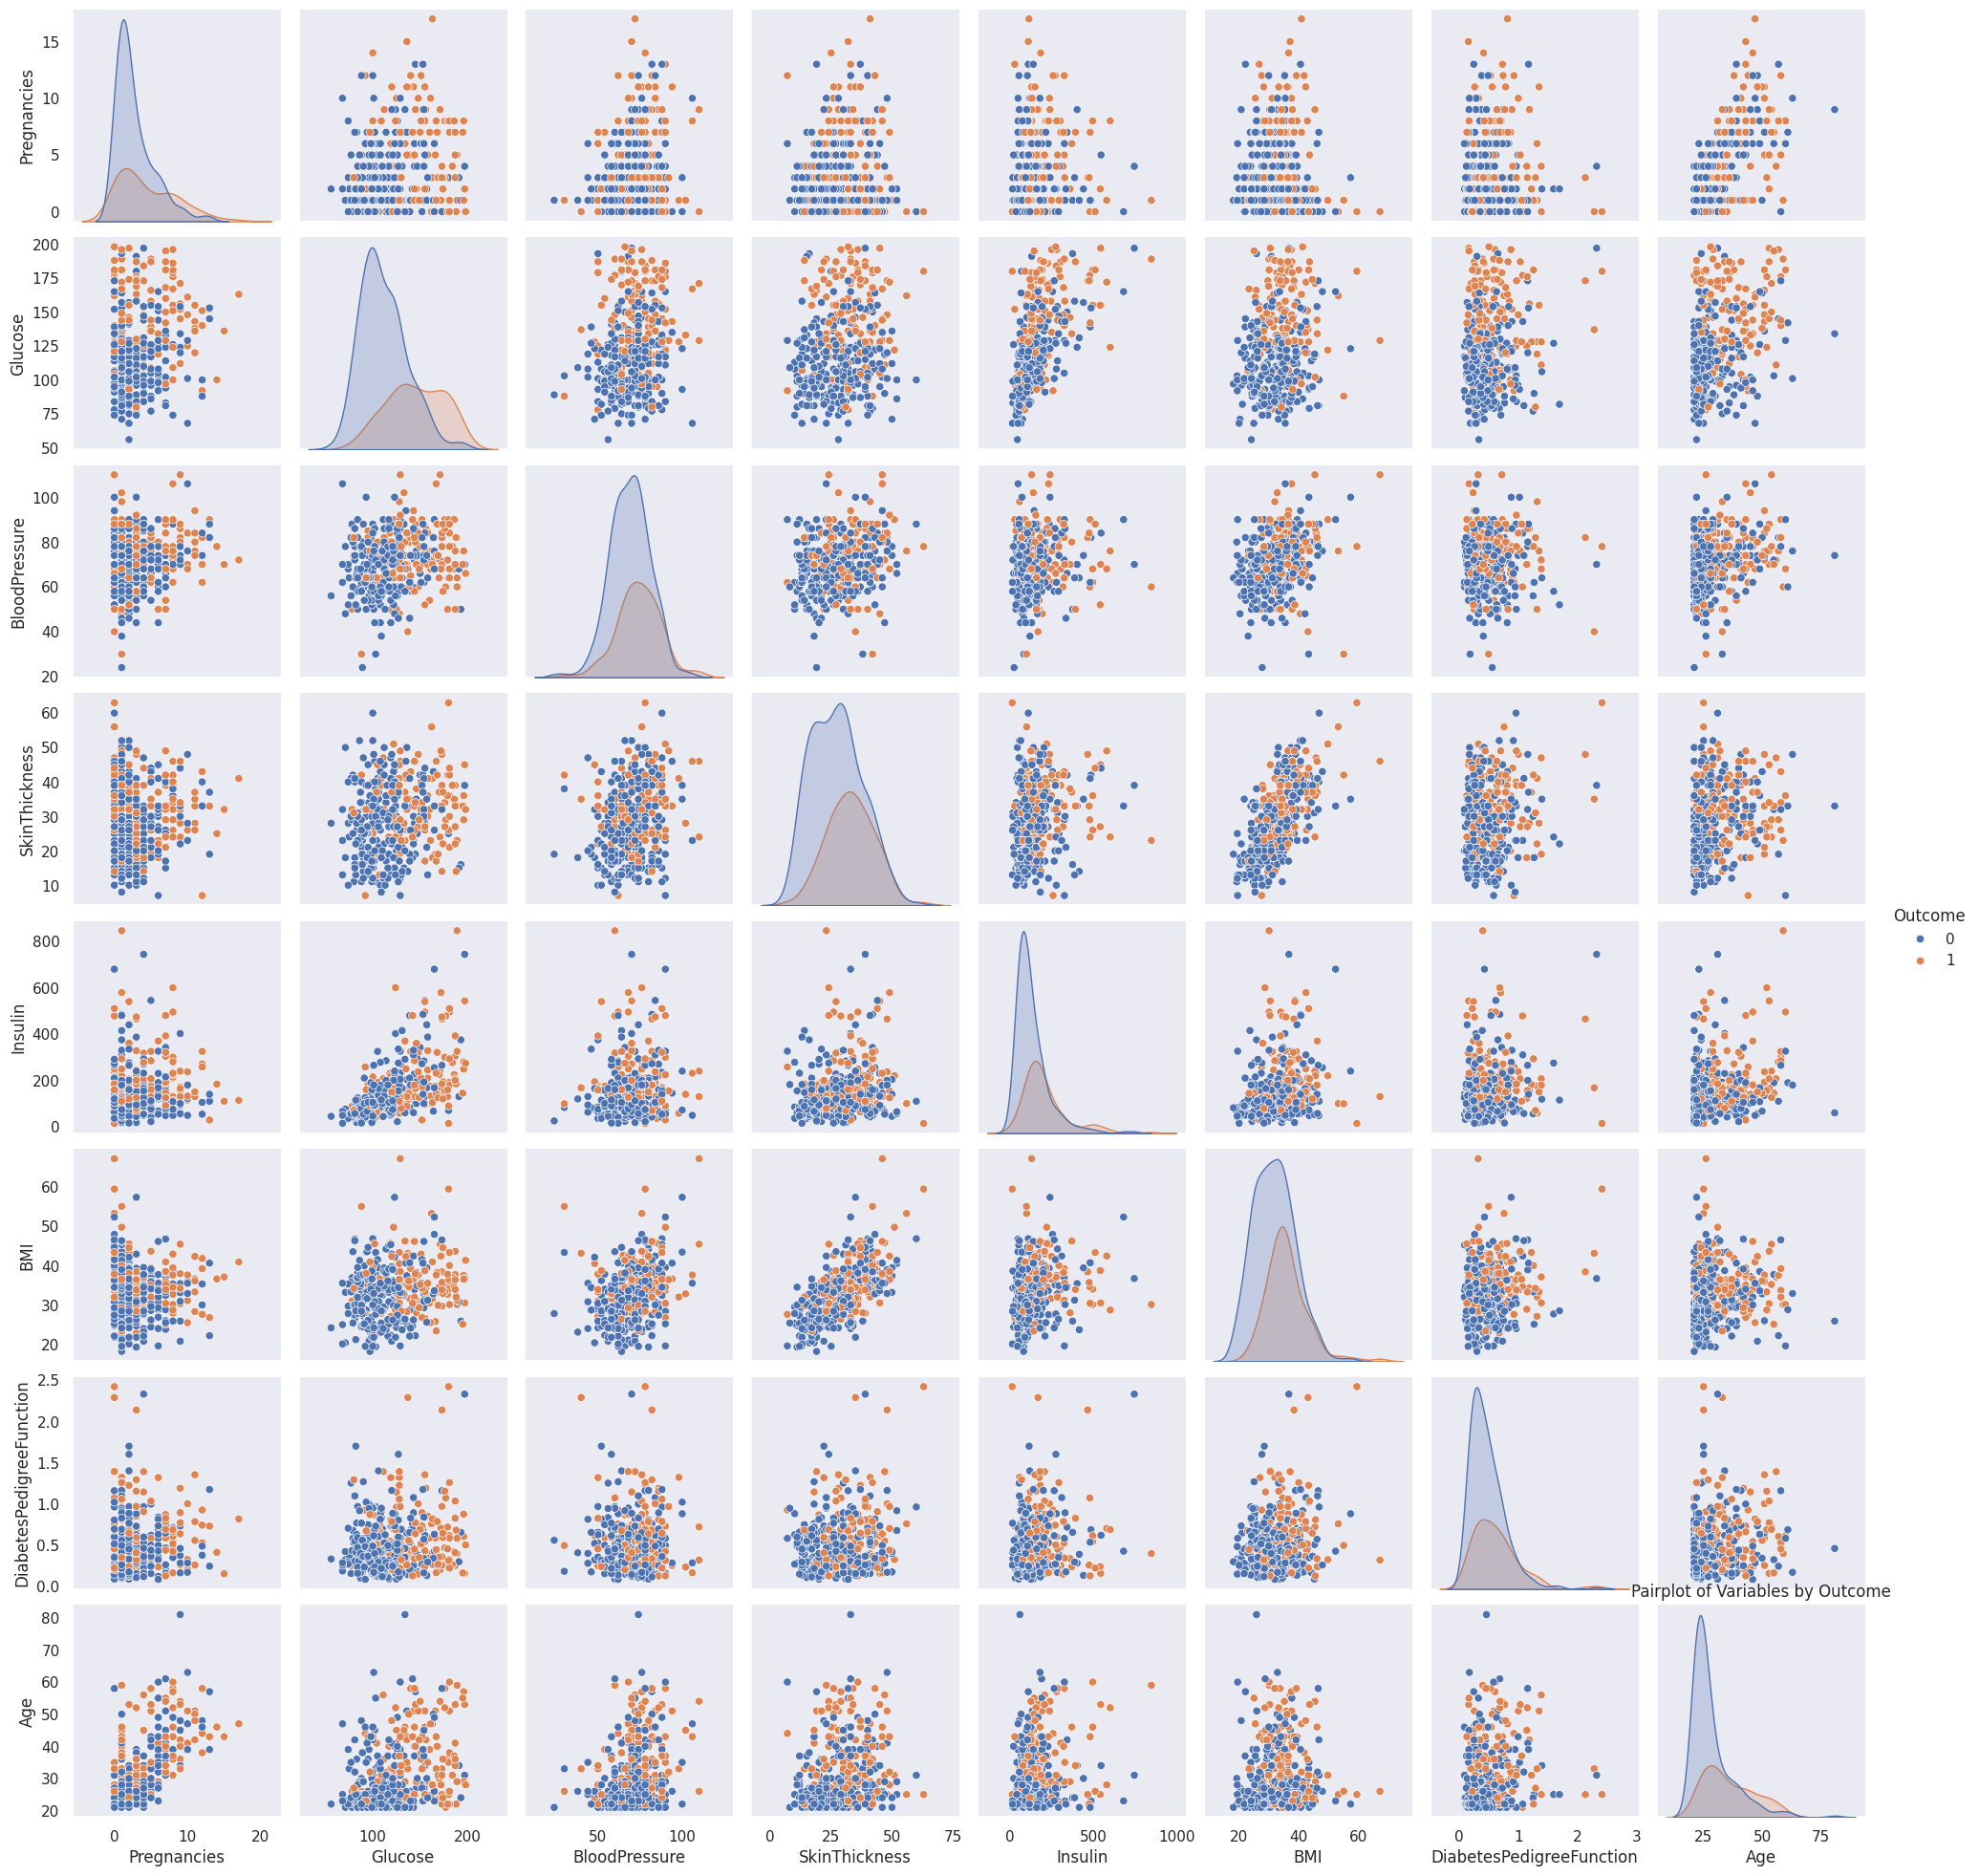

In [31]:
sns.pairplot(dia, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")


In [32]:
cor = dia.corr(method ='pearson')
cor


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


<Axes: >

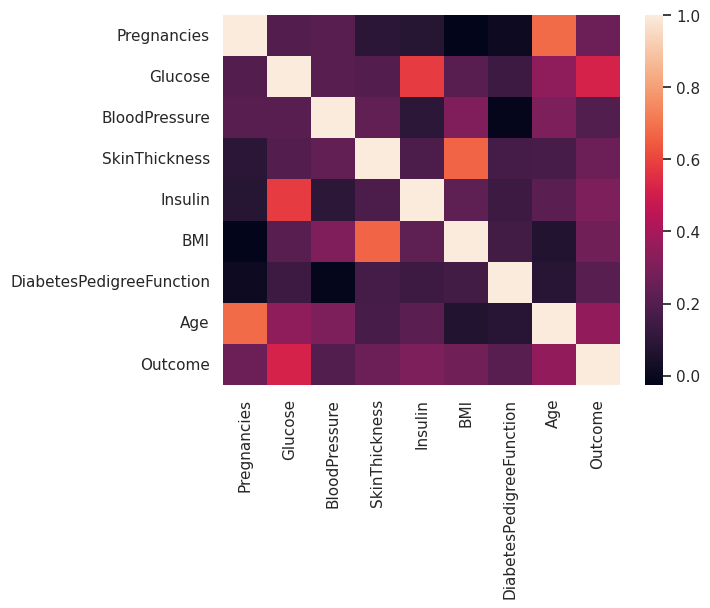

In [33]:
sns.heatmap(cor)


In [34]:
cols=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X=dia[cols]
y=dia.Outcome


In [36]:
!pip install statsmodels

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 5.2 MB/s eta 0:00:000:00:010:00:0101
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [37]:
## Importing stats models for running logistic regression
import statsmodels.api as sm
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,X)
## Fitting the model and publishing the results
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.563677
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.1128
Time:                        16:58:08   Log-Likelihood:                -220.96
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 8.717e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1299      0.049      2.655      0.008       0.034

In [38]:
cols2=["Pregnancies", "Glucose","BloodPressure","SkinThickness","BMI"]
X=dia[cols2]


In [39]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.569365
         Iterations 5
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Outcome          Pseudo R-squared: 0.104     
Date:               2024-11-04 16:58 AIC:              456.3820  
No. Observations:   392              BIC:              476.2383  
Df Model:           4                Log-Likelihood:   -223.19   
Df Residuals:       387              LL-Null:          -249.05   
Converged:          1.0000           LLR p-value:      1.5817e-10
No. Iterations:     5.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Pregnancies        0.1291   0.0374  3.4489 0.0006  0.0557  0.2024
Glucose            0.0215   0.0040  5.4447 0.0000  0.0138  0.0293


In [40]:
cols3=["Pregnancies", "Glucose","BloodPressure","SkinThickness"]
X=dia[cols3]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.572076
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                 0.09956
Time:                        16:58:27   Log-Likelihood:                -224.25
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 9.769e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1403      0.037      3.820      0.000       0.068       0.212
Glucose           0.

In [41]:
cols4=["Pregnancies", "Glucose","BloodPressure"]
X=dia[cols4]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.574607
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                 0.09558
Time:                        16:58:33   Log-Likelihood:                -225.25
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 4.597e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1405      0.037      3.826      0.000       0.069       0.212
Glucose           0.

In [44]:
!pip install scikit-learn



  Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [45]:
## Importing LogisticRegression from Sk.Learn linear model as stats model function cannot give us classification report and confusion matrix
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
cols4=["Pregnancies", "Glucose","BloodPressure"]
X=dia[cols4]
y=dia.Outcome
logreg.fit(X,y)
## Defining the y_pred variable for the predicting values. I have taken 392 dia dataset. We can also take a test dataset
y_pred=logreg.predict(X)
## Calculating the precision of the model
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       262
           1       0.68      0.55      0.61       130

    accuracy                           0.77       392
   macro avg       0.74      0.71      0.72       392
weighted avg       0.76      0.77      0.76       392



In [46]:
from sklearn.metrics import confusion_matrix
## Confusion matrix gives the number of cases where the model is able to accurately predict the outcomes.. both 1 and 0 and how many cases it gives false positive and false negatives
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[229  33]
 [ 59  71]]
